In [ ]:
!pip install finta
!pip install pandas_ta
!pip install ta
!pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 7.5 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=e5a2b63ca4912beb21e51a15f5ffb576a68ffd71fdc1500b7457eacab52b3791
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=5040bb98cb73286772992512f0a7c371c036209fa113f4c91cb9cc5e635217c2
  Stored in directory: /root/.cache/pip/wheels/bc/2a/c2/a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-w

In [ ]:
import rarfile
import numpy as np
import pandas as pd
from google.colab import files
import datetime
import finta
from finta import TA
import pandas_ta as pd_ta
from ta.trend import ADXIndicator
from ta.momentum import stoch
from ta.volume import on_balance_volume
import ta
import os
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [ ]:
def Df_builder(path):
  data = pd.read_excel(path)
  # data = data.rename(columns={'تاریخ میلادی':'Time' , '<OPEN>':'Open' , '<HIGH>':'High' ,'<LOW>':'Low' , '<CLOSE>':'Close' , '<VOL>':'Vol' , '<OPENINT>':'Openint'})
  # data = data.set_index(pd.to_datetime(data['Time'] , format='%Y%m%d'))
  # data.drop(data.columns[0:2] , axis=1 , inplace=True)
  data = data.rename(columns={'تاریخ میلادی':'Time' , 'OPEN':'Open' , 'HIGH':'High' ,'LOW':'Low' ,
                              'CLOSE':'Close' , 'VOL':'Vol' , 'OPENINT':'Openint' , 'LABEL':'Label'})
  data = data.set_index(pd.to_datetime(data['Time'] , format='%Y-%m-%d'))
  data.drop(data.columns[0:1] , axis=1 , inplace=True)
  return data

In [ ]:
def preprocesing(dataframe , show_details = False):

    nan = dataframe.isna().sum().sum()
    if nan != 0 :
      print(f'\033[91m There are/is {nan} missing values in dataset')


    dataframe['Low'] = np.where(dataframe['Close']<dataframe['Low'], dataframe['Close'] ,dataframe['Low'])
    dataframe['High']= np.where(dataframe['Open']> dataframe['High'],dataframe['Open'] , dataframe['High'])
    dataframe['High']= np.where(dataframe['Close']>dataframe['High'],dataframe['Close'] ,dataframe['High'])
    dataframe['Low'] = np.where(dataframe['Open']< dataframe['Low'], dataframe['Open'] , dataframe['Low'])


    if show_details == True : 
      for i in range(dataframe.shape[0]):
        if dataframe.iloc[i,1] < dataframe.iloc[i,0]:
          print(f.iloc[i , :])
        elif dataframe.iloc[i,3] < dataframe.iloc[i,2]:
          print(dataframe.iloc[i , :])
        elif dataframe.iloc[i,1] < dataframe.iloc[i,3]:
          print(dataframe.iloc[i , :])
        elif dataframe.iloc[i,0] < dataframe.iloc[i,2]:
          print(dataframe.iloc[i , :])

    return dataframe


In [ ]:
def Indicator_Builder(data):

    '''
    input : data

    step 1 : build an copy of main data for every indicatior separately
    step 2 : calculate indicatores and keep them in their specific columns
    step 3 : concatenate all of the target columns in final_indicator_df
    '''


    MACD = data.copy()
    RSI = data.copy()
    SMA = data.copy()
    WILIAM = data.copy()
    EMA = data.copy()
    STOCHASTIC = data.copy()
    TR = data.copy()
    ATR = data.copy()
    UOS = data.copy()
    KDJ=data.copy()
    ADX = data.copy()
    OBV = data.copy()
    MFI = data.copy()
    BB = data.copy()
    VWAP = data.copy()
    BIAS = data.copy()


    def MACD_builder(df , span_floor , span_ceil):
      floor = df['Close'].ewm(span=span_floor, adjust=False, min_periods=span_floor).mean()
      ceil = df['Close'].ewm(span=span_ceil, adjust=False, min_periods=span_ceil).mean()
      macd = floor - ceil
      return macd

    def MACD_Trigger_builder(macd , span ):
      trigger = macd.ewm(span=span, adjust=False, min_periods=span).mean()
      macd_trigger = macd - trigger
      return macd_trigger

    macd_716 = MACD_builder(data , 7 , 16 )
    macd_1226 = MACD_builder(data , 12 , 26 )
    macd_1428 = MACD_builder(data , 14 , 28 )

    macd_7169 = MACD_Trigger_builder(macd_716 , 9 )
    macd_122610 = MACD_Trigger_builder(macd_1226 , 10 )
    macd_142811 = MACD_Trigger_builder(macd_1428 , 11 )


    MACD['macd_716'] = macd_716
    MACD['MACD_1226'] = macd_1226
    MACD['macd_1428'] = macd_1428

    MACD['macd_7169'] = macd_7169
    MACD['macd_122610'] = macd_122610
    MACD['macd_142811'] = macd_142811

    ema_15 = pd_ta.ema(EMA['Close'] , length=15)
    ema_20 = pd_ta.ema(EMA['Close'] , length=20)

    EMA['ema_15']=ema_15
    EMA['ema_20']=ema_20

    RSI_15 = pd_ta.rsi(RSI['Close'] ,length=15)
    RSI_20 = pd_ta.rsi(RSI['Close'] ,length=20)
    RSI_25 = pd_ta.rsi(RSI['Close'] ,length=25)
    RSI_30 = pd_ta.rsi(RSI['Close'] ,length=30)

    RSI['RSI_15'] = RSI_15
    RSI['RSI_20'] = RSI_20
    RSI['RSI_25'] = RSI_25
    RSI['RSI_30'] = RSI_30

    sma_20 = SMA['Close'].rolling(window=20).mean()
    sma_15 = SMA['Close'].rolling(window=15).mean()

    SMA['sma_15'] = sma_15
    SMA['sma_20'] = sma_20

    # method 2
        # sma_20 = pd_ta.sma(close=SMA['Close'], length=20, append=True)
        # sma_20 = pd_ta.sma(close=SMA['Close'], length=15, append=True)

    wiliam_14 =  TA.WILLIAMS(WILIAM , period= 14)
    wiliam_18 =  TA.WILLIAMS(WILIAM , period= 18)
    wiliam_20 =  TA.WILLIAMS(WILIAM , period= 20)

    WILIAM['wiliam_14'] = wiliam_14
    WILIAM['wiliam_18'] = wiliam_18
    WILIAM['wiliam_20'] = wiliam_20

    # method 2
    # w_14 = pd_ta.WILIAM(high=wilii['High'] , low=wilii['Low'] , close=wilii['Close'] , length=14)
    # w_18 = pd_ta.WILIAM(high=wilii['High'] , low=wilii['Low'] , close=wilii['Close'] , length=18)
    # w_20 = pd_ta.WILIAM(high=wilii['High'] , low=wilii['Low'] , close=wilii['Close'] , length=20)


    def stochastic(df, k, d):
      df = df.copy()
      low_min  = df['Low'].rolling(window=k).min()
      high_max = df['High'].rolling( window=k).max()
      df['stoch_k'] = 100 * (df['Close'] - low_min)/(high_max - low_min)
      df['stoch_d'] = df['stoch_k'].rolling(window=d).mean()
      return df['stoch_k']
      

    STOCHASTIC['stochk_14'] = stochastic(STOCHASTIC, k=14, d=3)
    STOCHASTIC['stochk_18'] = stochastic(STOCHASTIC, k=18, d=3)
    STOCHASTIC['stochk_20'] = stochastic(STOCHASTIC, k=20, d=3)

    # method 2
    # stochk_14 = TA.STOCH(STOCHASTIC1 , period=20)
    # stochk_18 = TA.STOCH(STOCHASTIC1 , period=20)
    # stochk_20 = TA.STOCH(STOCHASTIC1 , period=20)

    # stochk_14 = stoch(high=STOCHASTIC['High'], low=STOCHASTIC['Low'] , close=STOCHASTIC['Close'], window=14)
    # stochk_18 = stoch(high=STOCHASTIC['High'], low=STOCHASTIC['Low'] , close=STOCHASTIC['Close'], window=18)
    # stochk_20 = stoch(high=STOCHASTIC['High'], low=STOCHASTIC['Low'] , close=STOCHASTIC['Close'], window=20)



    tr = pd_ta.true_range(high=TR['High'], low=TR['Low'] , close=TR['Close'])
    TR['tr'] = tr

    atr = TA.ATR(ATR)
    ATR['atr'] = atr

    uos_71428 = pd_ta.uo(high=UOS['High'], low=UOS['Low'] , close=UOS['Close'] , fast =7 , medium =14 , slow =22 )
    uos_81622 = pd_ta.uo(high=UOS['High'], low=UOS['Low'] , close=UOS['Close'] , fast =8 , medium =16 , slow =28 )
    uos_91836 = pd_ta.uo(high=UOS['High'], low=UOS['Low'] , close=UOS['Close'] , fast =9 , medium =18 , slow =36 )
    UOS['uos_71428'] = uos_71428
    UOS['uos_81622'] = uos_81622
    UOS['uos_91836'] = uos_91836

    kdj = pd_ta.kdj(high=KDJ['High'], low=KDJ['Low'] , close=KDJ['Close'] , length=14 )
    KDJ[['kdj_K' , 'kdj_D' , 'kdj_J']]=kdj

    adx = pd_ta.adx(high=ADX['High'] , low=ADX['Low'] , close=ADX['Close'] , length=14)
    ADX[['ADX' , 'DMP' , 'DMN']] = adx

    # method 2 
    # adx = ta.trend.adx(high=ADX['High'] , low=ADX['Low'] , close=ADX['Close'] )

    obv = pd_ta.obv(close=OBV['Close'] , volume=OBV['Vol'])
    OBV['obv'] = obv

    # method 2
    # OBV1 = data.rename(columns={'Vol':'Volume'})
    # obv1 = TA.OBV(OBV)


    mfi = pd_ta.mfi(high=MFI['High'] , low=MFI['Low'] ,close=MFI['Close'] , volume=MFI['Vol'] , length=14)
    MFI['mfi'] = mfi

    bb = pd_ta.bbands(close=BB['Close'] ,length=14 , std=2)
    BB[['BBL' , 'BBM' , 'BBU' , 'BBB' , 'BBP']] = bb

    vwap = pd_ta.vwap(close=VWAP['Close'] , high=VWAP['High'] , low=VWAP['Low'] , volume=VWAP['Vol'])
    VWAP['vwap'] = vwap

    bias = pd_ta.bias(close=BIAS['Close'] , length=14)
    BIAS['bias'] = bias


    final_indicator_df = pd.concat([data[['Close' , 'Vol']],
                                    MACD['macd_716'],MACD['MACD_1226'],MACD['macd_1428'],MACD['macd_7169'],MACD['macd_122610'] ,MACD['macd_142811'],
                                    EMA['ema_15'],EMA['ema_20'],
                                    RSI['RSI_15'],RSI['RSI_20'],RSI['RSI_25'],RSI['RSI_30'],
                                    SMA['sma_15'],SMA['sma_20'],
                                    WILIAM['wiliam_14'],WILIAM['wiliam_18'],WILIAM['wiliam_20'],
                                    STOCHASTIC['stochk_14'],STOCHASTIC['stochk_18'],STOCHASTIC['stochk_20'],
                                    TR['tr'],
                                    ATR['atr'],
                                    UOS['uos_71428'],UOS['uos_81622'],UOS['uos_91836'],
                                    KDJ[['kdj_K' , 'kdj_D' , 'kdj_J']],
                                    ADX['ADX'],
                                    OBV['obv'],
                                    MFI['mfi'],
                                    BB['BBU'],
                                    VWAP['vwap'],
                                    BIAS['bias'],
                                    data['Label']],
                                  axis = 1)
    
    return final_indicator_df


In [ ]:
upload = files.upload()

Saving labeled - Copy.rar to labeled - Copy.rar


In [ ]:
zip_path = "/content/labeled - Copy.rar"

unzip_path = '/content/test_files'

with rarfile.RarFile(zip_path , 'r') as unrar :
  unrar.extractall(unzip_path)

files = os.listdir(path=unzip_path)
file_paths = [os.path.join(unzip_path , f_name) for f_name in files]




file_paths

['/content/test_files/خساپا.xlsx',
 '/content/test_files/پارسیان.xlsx',
 '/content/test_files/خودرو.xlsx',
 '/content/test_files/فلوله.xlsx',
 '/content/test_files/کچاد.xlsx',
 '/content/test_files/فملی.xlsx',
 '/content/test_files/کروی.xlsx',
 '/content/test_files/شبهرن.xlsx',
 '/content/test_files/وبملت.xlsx',
 '/content/test_files/سفارس.xlsx']

In [ ]:
def featureSelection(df):
    df = df[40:]
    fs = SelectKBest(score_func=f_classif, k="all")
    fs.fit(df.iloc[:,:-1], df.iloc[:,-1])

    mdict = dict()
    for i in range(len(df.columns)-1):
        mdict[df.columns[i]] = fs.scores_[i]
    

    Scores = sorted(mdict.items(), key=lambda x: x[1] , reverse = True)
    print(Scores)
        
    pyplot.figure(figsize=(16,8))
    pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
    pyplot.xticks(list(range(len(df.columns)-1)),list(df.columns[:-1]) , rotation=90)
    pyplot.show()
        
        
    # df.drop(["ema_15","ema_20","sma_15","sma_20","BBU","vwap","tr","atr","Close"] ,axis = 1 ,inplace = True)


    return df



/content/test_files/خساپا.xlsx
خساپا
[('wiliam_14', 1353.4162232432125), ('stochk_14', 1353.4162232431993), ('kdj_J', 1221.3452889951059), ('wiliam_18', 1070.4705519439688), ('stochk_18', 1070.4705519439663), ('stochk_20', 940.5070534304347), ('wiliam_20', 940.5070534304151), ('uos_71428', 743.0940604710219), ('kdj_K', 692.5043440374449), ('uos_81622', 658.2881379889819), ('bias', 646.7962041946076), ('RSI_15', 610.3070146200589), ('uos_91836', 582.662778475561), ('RSI_20', 472.41494375622386), ('RSI_25', 387.62357069774106), ('RSI_30', 330.54111486500534), ('kdj_D', 302.9570392255863), ('mfi', 178.13880876025297), ('macd_7169', 145.72210286817477), ('macd_122610', 120.28090532310588), ('macd_142811', 107.36970003513144), ('macd_716', 80.29478670885354), ('ADX', 36.62588261634788), ('MACD_1226', 29.009374661142548), ('Vol', 22.842214586632274), ('macd_1428', 21.429196220642687), ('sma_20', 7.303960481165124), ('sma_15', 5.915978884556514), ('ema_20', 5.323630764764631), ('ema_15', 4.33

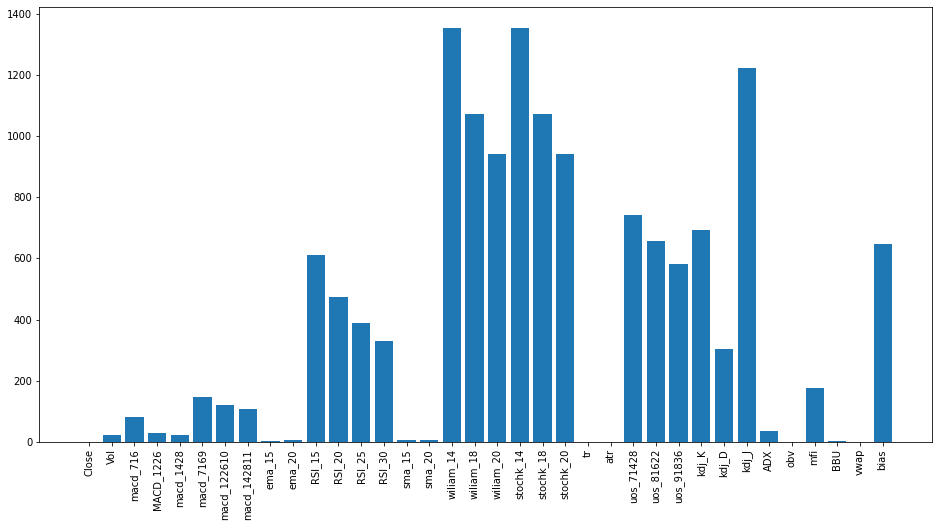

                  Close        Vol   macd_716  MACD_1226  macd_1428  \
Time                                                                  
2011-05-23    90.186952    8789922  -1.821952  -1.151651  -0.826116   
2011-05-24    86.885311   14381713  -2.535446  -1.723850  -1.320773   
2011-05-25    85.292413    5262625  -3.143865  -2.279578  -1.810296   
2011-05-28    81.961810    3847570  -3.894843  -2.954689  -2.403028   
2011-05-29    79.905524    1897746  -4.549415  -3.613984  -2.991563   
...                 ...        ...        ...        ...        ...   
2022-03-06  1702.000000  305716050  10.474343  12.984759  11.771486   
2022-03-07  1645.000000  303612258   6.412633  10.792899  10.115322   
2022-03-08  1620.000000  180093254   0.227305   6.958332   7.076759   
2022-03-09  1707.000000  363777989   7.642095  10.814915  10.159879   
2022-03-12  1603.000000  446721723  -1.440533   5.416912   5.859961   

            macd_7169  macd_122610  macd_142811       ema_15       ema_20  \

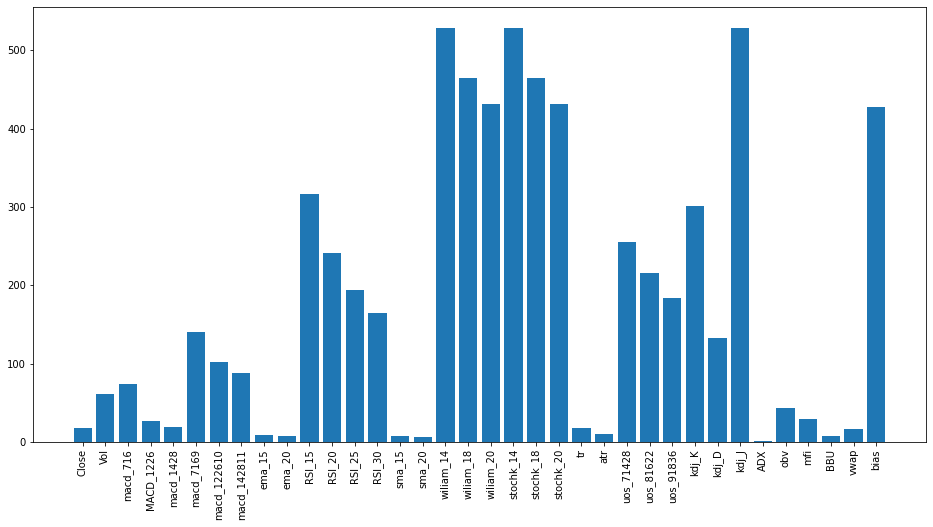

                  Close       Vol    macd_716   MACD_1226  macd_1428  \
Time                                                                   
2011-05-23   166.127038    662396    2.239829    1.343268   0.910501   
2011-05-24   166.127038    601580    1.938667    1.339807   0.952687   
2011-05-25   164.099893   1185453    1.414051    1.160118   0.847483   
2011-05-28   160.193930    161123    0.508322    0.694528   0.503383   
2011-05-29   157.029605    652940   -0.524815    0.069410   0.017421   
...                 ...       ...         ...         ...        ...   
2022-04-10  3915.000000  44194664  130.392932  109.361858  92.660217   
2022-04-11  3811.000000  20011840  127.509139  115.598078  99.403979   
2022-04-12  3715.000000   1852149  109.144596  111.508528  97.752126   
2022-04-13  3713.000000  20980615   93.516748  106.874169  95.391647   
2022-04-16  3692.000000   7268804   77.644886  100.350108  91.258095   

            macd_7169  macd_122610  macd_142811       ema_15   

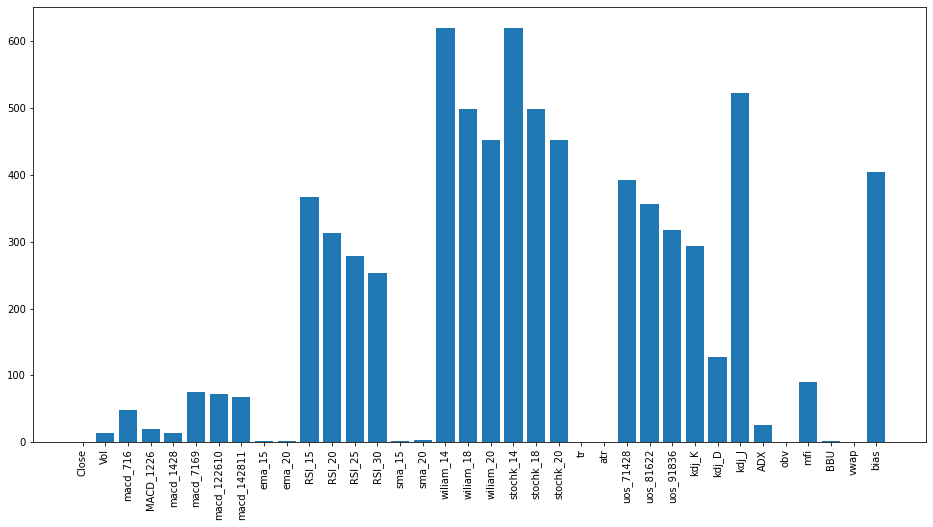

                  Close         Vol    macd_716   MACD_1226   macd_1428  \
Time                                                                      
2011-05-23    82.419606      749884   -0.755929   -0.429979   -0.510606   
2011-05-24    81.741430      674420   -1.514723   -0.964199   -0.934692   
2011-05-25    80.872516      277602   -2.087318   -1.441075   -1.324221   
2011-05-28    80.533428      168063   -2.449729   -1.825322   -1.648180   
2011-05-29    80.321498       43368   -2.645559   -2.122476   -1.908067   
...                 ...         ...         ...         ...         ...   
2022-04-03  2594.000000  1581037953  119.598292  123.460346  111.802201   
2022-04-04  2532.000000  1764309575  113.632271  125.162036  114.375231   
2022-04-05  2647.000000  1183322006  121.562631  134.242710  122.801973   
2022-04-06  2506.000000  1246435605  104.573528  128.579503  119.396406   
2022-04-09  2462.000000   961558876   84.431517  119.167253  112.718384   

            macd_7169  m

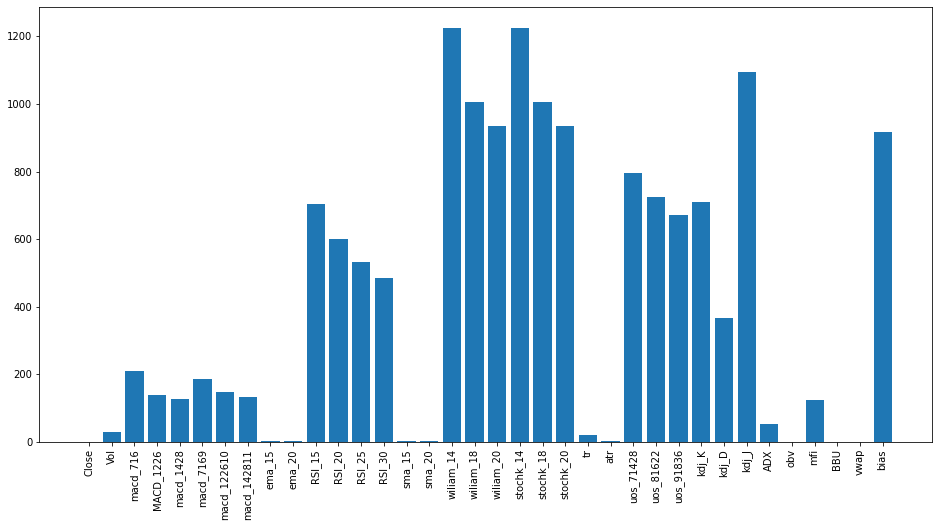

                  Close        Vol    macd_716   MACD_1226   macd_1428  \
Time                                                                     
2011-06-01   119.479750      51640   -0.772704   -1.782678   -1.870006   
2011-06-06   121.391101      20320   -0.498572   -1.568312   -1.687132   
2011-06-07   121.391101        300   -0.302497   -1.382489   -1.524058   
2011-06-08   114.721707     373888   -1.046559   -1.753177   -1.807753   
2011-06-11   113.867699     113650   -1.621201   -2.091750   -2.075014   
...                 ...        ...         ...         ...         ...   
2022-05-01  1990.000000   25851380  111.784780  184.285739  180.019201   
2022-05-02  2084.000000   76771679  120.313975  188.246668  183.563466   
2022-05-07  2187.000000   19210995  136.052002  197.421222  191.365267   
2022-05-08  2292.000000  104627461  156.362402  210.735517  202.659453   
2022-05-09  2350.000000  310379692  172.880684  223.392182  213.642491   

            macd_7169  macd_122610  m

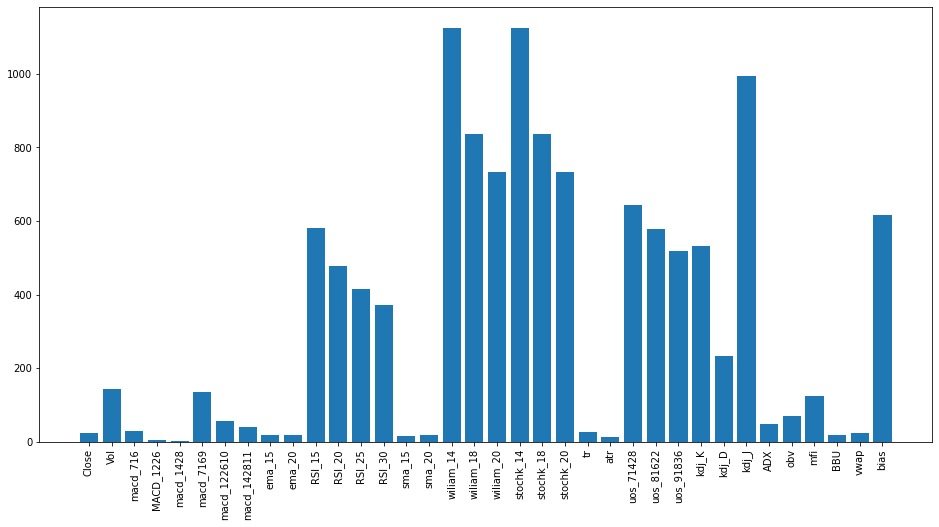

                   Close      Vol    macd_716   MACD_1226   macd_1428  \
Time                                                                    
2011-05-23    165.000368  1178340   -0.120040   -0.710689   -0.629240   
2011-05-24    160.580517  3248690   -0.763232   -1.045108   -0.904759   
2011-05-25    157.693177  7455546   -1.548573   -1.525537   -1.304605   
2011-05-31    161.391137   197006   -1.533302   -1.589563   -1.377214   
2011-06-01    159.548053  1186737   -1.722037   -1.768637   -1.541774   
...                  ...      ...         ...         ...         ...   
2022-04-04  15890.000000  6433968  231.900171  481.274034  480.959785   
2022-04-05  15940.000000  5625599  198.545657  449.872940  455.303583   
2022-04-06  15850.000000  5880936  158.721474  412.964699  424.621879   
2022-04-09  16050.000000  4502198  154.169545  395.296251  408.833912   
2022-04-10  16080.000000  3800312  150.593429  379.341812  394.266298   

             macd_7169  macd_122610  macd_142811  

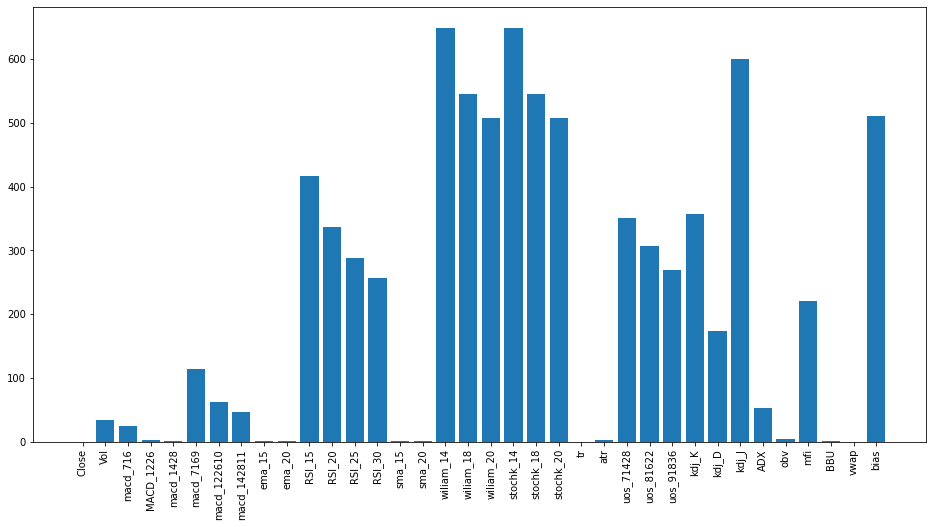

                  Close        Vol    macd_716   MACD_1226   macd_1428  \
Time                                                                     
2011-05-23   116.331034    8681714    1.024744    0.605765    0.576170   
2011-05-24   114.870947    1054155    1.196082    0.801646    0.738692   
2011-05-25   112.934919    5343830    1.018050    0.791537    0.738421   
2011-05-28   112.934919    3435458    0.870292    0.774596    0.731412   
2011-05-29   110.894024    2239570    0.476796    0.589690    0.587662   
...                 ...        ...         ...         ...         ...   
2022-04-04  7830.000000  171540774  206.480584  197.077400  174.466472   
2022-04-05  7800.000000   72123013  209.210785  209.245648  186.621046   
2022-04-06  7560.000000   83882552  173.099571  197.249310  179.264199   
2022-04-09  7680.000000   83617369  159.993633  195.175264  179.403716   
2022-04-10  7560.000000   59603936  130.732538  181.753430  170.142465   

            macd_7169  macd_122610  m

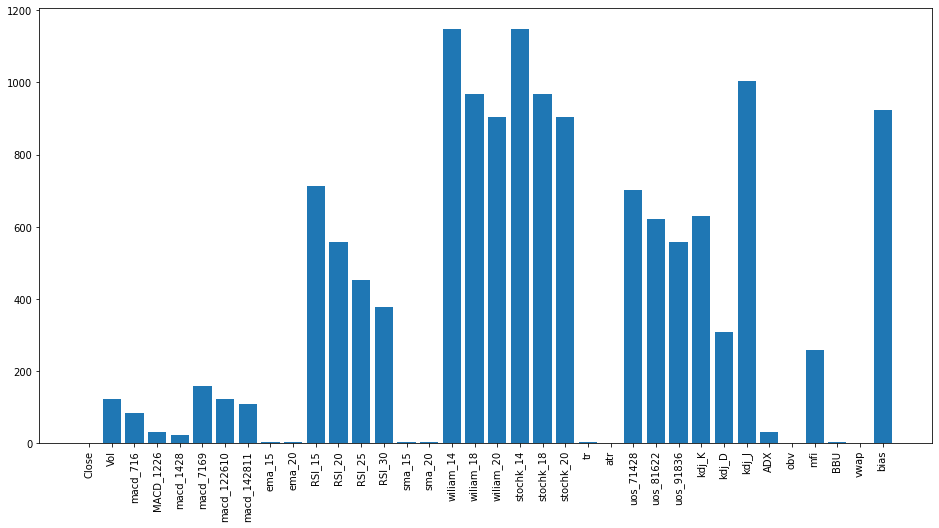

                   Close      Vol    macd_716    MACD_1226    macd_1428  \
Time                                                                      
2011-05-25    667.836006  1273474  -30.423134   -36.117980   -32.213835   
2011-05-28    664.696696  1209963  -32.040909   -37.951213   -34.067121   
2011-05-29    652.348741  1031850  -33.803403   -39.940036   -36.044080   
2011-05-30    678.509662  2814767  -30.513068   -38.956163   -35.623921   
2011-06-06    734.895947  2005747  -19.975306   -33.243326   -31.327858   
...                  ...      ...         ...          ...          ...   
2022-04-13  25580.000000   663193  404.481253  1019.596859  1029.103032   
2022-04-16  26580.000000  3238841  459.755906  1016.939280  1024.963600   
2022-04-17  27580.000000  4573204  615.165430  1083.040159  1076.566370   
2022-04-18  27900.000000  2210937  742.269808  1148.013325  1128.902708   
2022-04-19  28210.000000  1204536  845.580946  1210.564799  1180.706027   

             macd_7169  

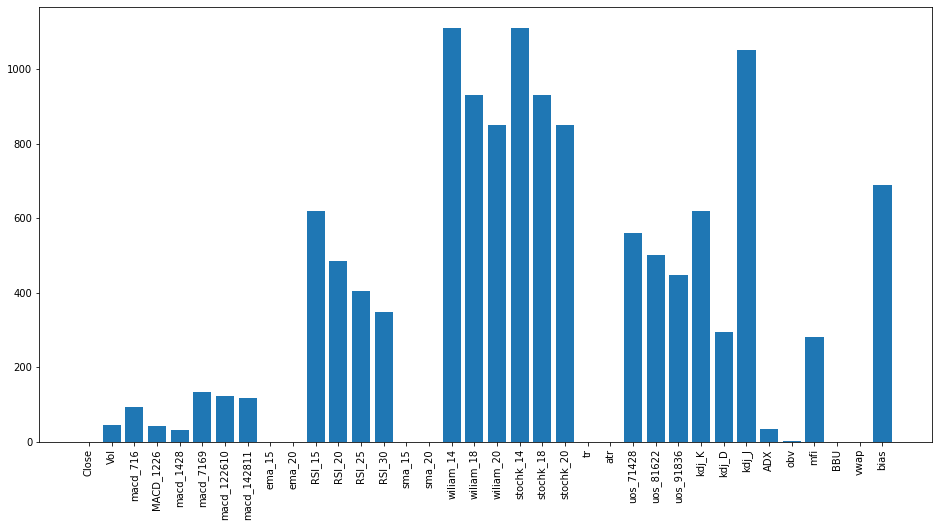

                   Close      Vol    macd_716   MACD_1226   macd_1428  \
Time                                                                    
2011-05-23    163.669856    64822   -2.177063   -1.481474   -1.003558   
2011-05-24    160.567110    60781   -2.546269   -1.857886   -1.355307   
2011-05-25    158.433972    79206   -2.998033   -2.301788   -1.763976   
2011-05-28    164.833386    91676   -2.361835   -2.112848   -1.665592   
2011-06-14    144.293207   220917   -4.589910   -3.579273   -2.893017   
...                  ...      ...         ...         ...         ...   
2022-04-30  12810.000000  3836698  250.345698  452.273010  445.617945   
2022-05-01  13350.000000  8814857  316.140051  485.802446  473.034453   
2022-05-02  13770.000000  4315061  405.970431  540.040010  517.841479   
2022-05-07  14220.000000  8873692  513.035522  612.276962  578.199870   
2022-05-09  14140.000000  5671109  558.209905  655.513583  616.436643   

             macd_7169  macd_122610  macd_142811  

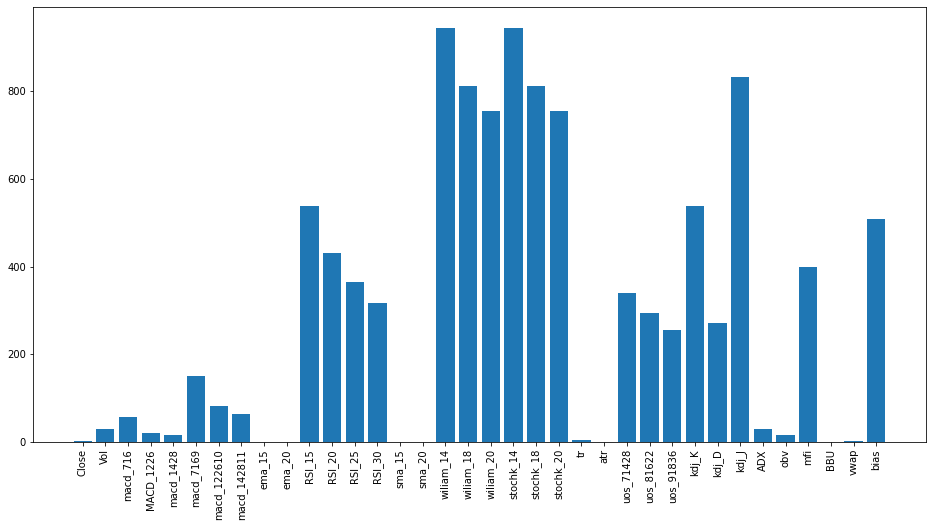

                  Close        Vol    macd_716   MACD_1226   macd_1428  \
Time                                                                     
2011-05-23   105.587248    4587309    0.854875    1.249937    1.174646   
2011-05-24   102.244116    1604372    0.247578    0.887173    0.889165   
2011-05-25   102.940602    3126943   -0.069409    0.648406    0.695467   
2011-05-28   100.572550    2478531   -0.590557    0.265044    0.380352   
2011-05-29    97.833040    4331856   -1.280648   -0.256867   -0.053748   
...                 ...        ...         ...         ...         ...   
2022-04-03  3997.000000  333620369  167.963408  187.363722  173.272321   
2022-04-04  4010.000000  432509739  164.581250  191.605586  178.117349   
2022-04-05  4000.000000  222296334  156.178903  191.947723  179.745246   
2022-04-06  3858.000000  273505984  127.230912  178.700706  170.265731   
2022-04-09  3815.000000  189822784   98.640891  162.855314  158.283266   

            macd_7169  macd_122610  m

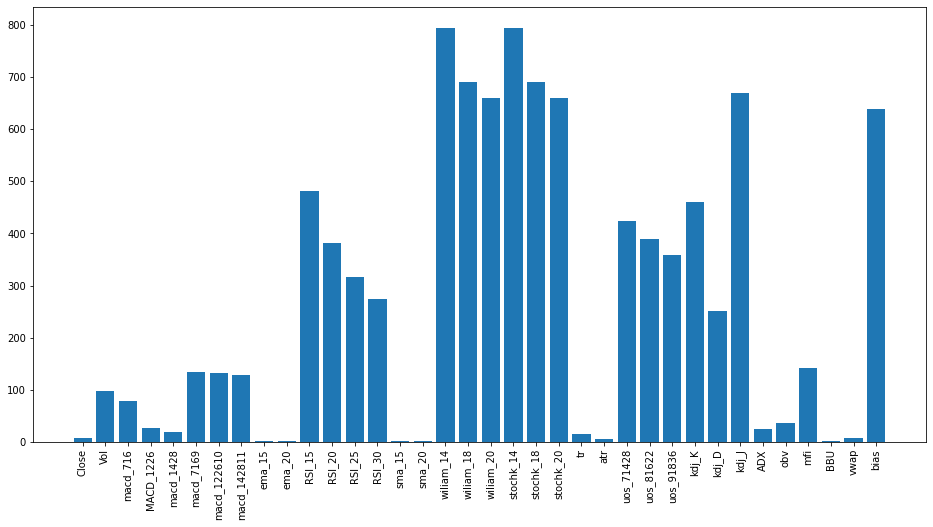

                   Close      Vol    macd_716    MACD_1226   macd_1428  \
Time                                                                     
2011-05-24    351.175095    98750   -5.427177    -7.685695   -7.204988   
2011-05-25    352.389183   202342   -5.303409    -7.659736   -7.227469   
2011-05-28    349.050440   177700   -5.507414    -7.818445   -7.394057   
2011-05-29    342.069431   300933   -6.404392    -8.410581   -7.909837   
2011-05-30    350.871573   113381   -5.644626    -8.076492   -7.686710   
...                  ...      ...         ...          ...         ...   
2022-04-04  18750.000000  5048225  921.984253   920.083543  816.546293   
2022-04-05  19510.000000  3299705  993.191952  1006.237443  896.540930   
2022-04-06  18800.000000  3731038  917.132578  1005.631667  907.143123   
2022-04-09  19150.000000  1847808  886.148210  1021.617095  929.885185   
2022-04-10  19500.000000  3811796  885.904196  1050.419158  962.213744   

             macd_7169  macd_122610  

In [ ]:
for path in file_paths :
  filename = path.split('/')[-1]
  name = filename.split('.')[0]
  print(path)
  print(name)
  dataframe_preprossed = Df_builder(path)                
  dataframe_posprossed = preprocesing(dataframe_preprossed , show_details=True)
  indicator = Indicator_Builder(dataframe_preprossed)
  result = featureSelection(indicator)
  distination_path = '/content/'+ name +'.csv'
  result.to_csv(distination_path)
  # print(distination_path)
  # print(dataframe_preprossed)
  print(result)
  print('------------------------------------------------------------')

In [ ]:
# for i in range(36):
#   print(f"----------{i}----------")

#   for j in range(len(scoresList)):
#     Scores = sorted(scoresList[j].items(), key=lambda x: x[1] , reverse = True)
#     print(Scores[i])



  